In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


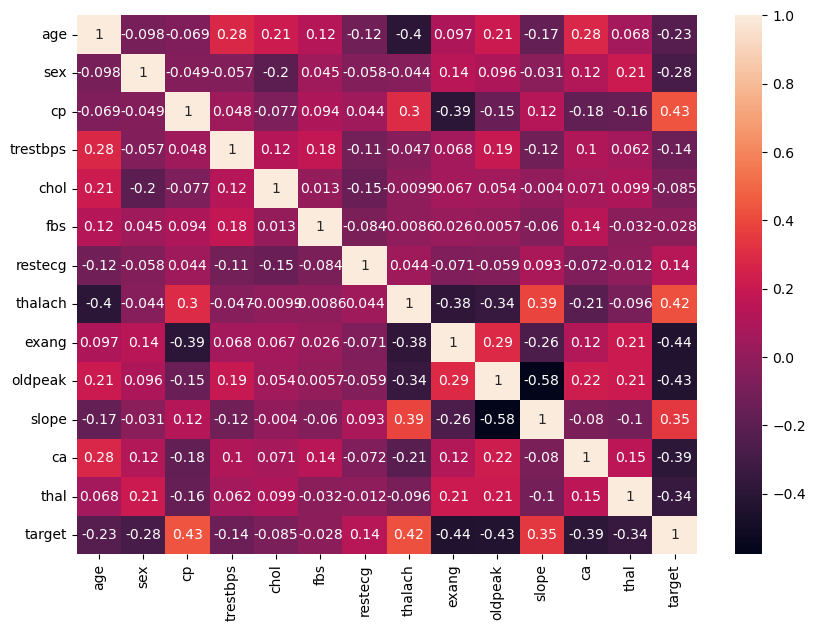

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

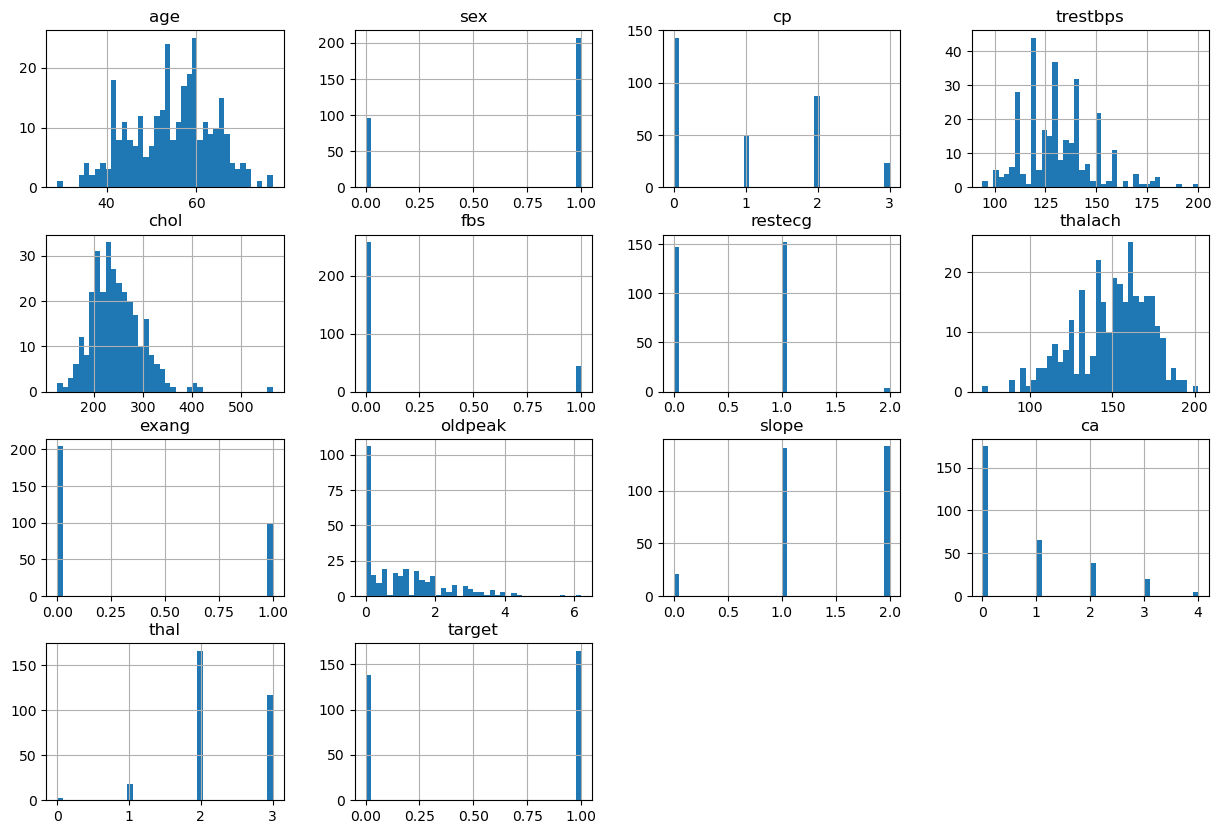

In [7]:
df.hist(bins=40,figsize=(15,10))
plt.show()

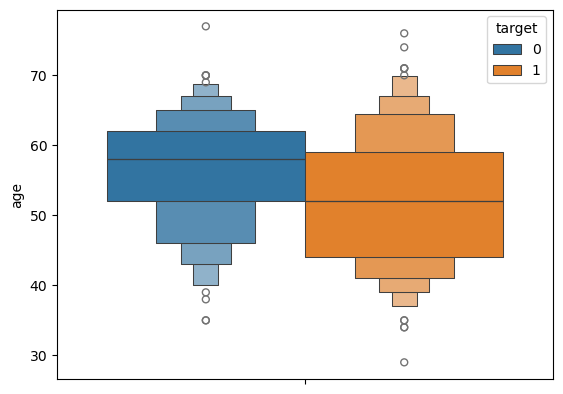

In [8]:
sns.boxenplot(data=df,y="age",hue="target")
plt.show()

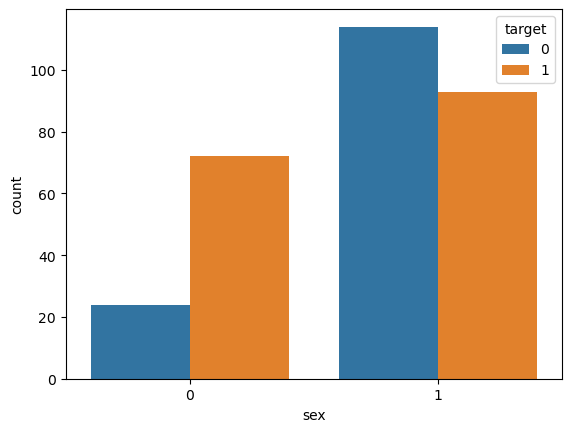

In [9]:
sns.countplot(data=df,x="sex",hue="target")
plt.show()

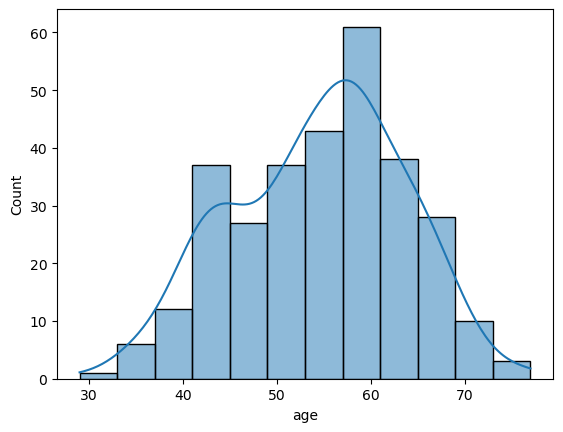

In [10]:
sns.histplot(df["age"],kde=True)
plt.show()

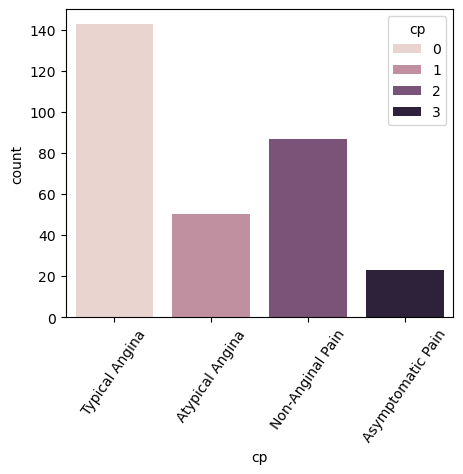

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['cp'],hue=df["cp"])
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic Pain'])
plt.xticks(rotation=55)
plt.show()

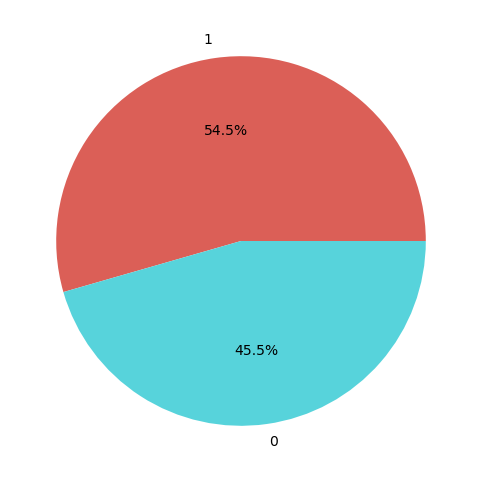

In [12]:
colors = sns.color_palette("hls", 2)
plt.figure(figsize=(8,6))
plt.pie(x=df["target"].value_counts(),labels=df["target"].value_counts().index, autopct='%1.1f%%',colors=colors )
plt.show()

In [13]:
X = df.drop('target', axis = 1)
y = df['target']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [15]:
#Checking for multicollinearity
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                colname = corr.columns[i]
                columns_to_drop.add(colname)
    return columns_to_drop

In [16]:
#There isn't any multicollinearity
correlation_for_dropping(X_train, 0.85)

set()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [18]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.83      0.76      0.79        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



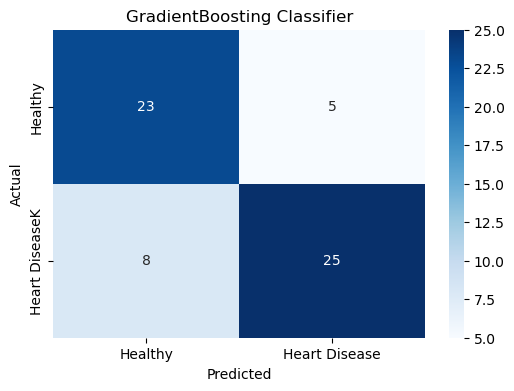

In [19]:
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=["Healthy","Heart Disease"],
           yticklabels=["Healthy","Heart DiseaseK",])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GradientBoosting Classifier')
plt.show()

In [20]:
parameters = {
        "loss" : ['log_loss', 'exponential'],
        "learning_rate" : [0.01, 0.05, 0.1],
        "n_estimators" : [100, 150, 180, 200],
        "max_depth" : [3,4,5],
        "subsample" : [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = parameters, cv = 5, n_jobs = -1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
grid_search.best_params_

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
           xticklabels=["Healthy","Heart Disease"],
           yticklabels=["Healthy","Heart Disease",])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GradientBoosting Classifier')
plt.show()